# Class 04 - Anomaly Detection

In [33]:
import pandas as pd

In [34]:
df_transactions = pd.read_csv("./transaction.csv")
df_transactions

,transacao1,transacao2
0,12.669211,62.587129
1,32.354746,-21.460716
2,-16.493253,33.112899
3,1.042115,60.217991
4,11.959012,59.423824
...,...,...
645,372.009668,24.065374
646,399.629828,37.392594
647,391.935880,15.374113
648,382.099797,6.520470


## EDA

In [35]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   transacao1  650 non-null    float64
 1   transacao2  650 non-null    float64
dtypes: float64(2)
memory usage: 10.3 KB


In [36]:
df_transactions.describe()

,transacao1,transacao2
count,650.000000,650.000000
mean,195.996809,75.626776
std,164.365153,94.099071
min,-189.632622,-129.689793
25%,16.762615,4.092314
50%,198.526035,30.041190
75%,382.220206,186.598493
max,456.036150,298.963511


# Model

In [37]:
from sklearn.ensemble import IsolationForest

In [38]:
model_forest = IsolationForest(random_state=7)
model_forest.fit(df_transactions)

,n_estimators,100
,max_samples,'auto'
,contamination,'auto'
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,7
,verbose,0
,warm_start,False


In [39]:
df_transactions["anomaly_score"] = model_forest.decision_function(df_transactions)
df_transactions

,transacao1,transacao2,anomaly_score
0,12.669211,62.587129,0.056394
1,32.354746,-21.460716,0.010236
2,-16.493253,33.112899,0.082883
3,1.042115,60.217991,0.058404
4,11.959012,59.423824,0.057398
...,...,...,...
645,372.009668,24.065374,0.054239
646,399.629828,37.392594,0.042328
647,391.935880,15.374113,0.092313
648,382.099797,6.520470,0.080525


<Axes: ylabel='Density'>

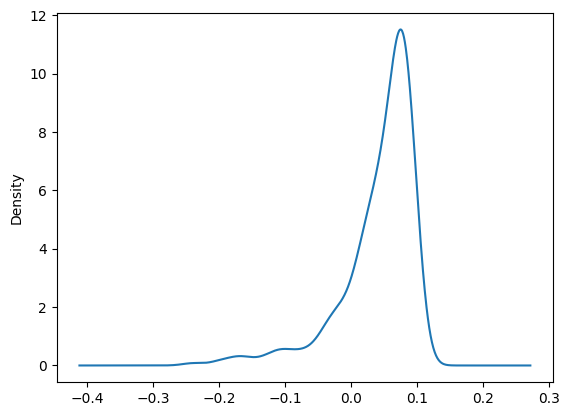

In [40]:
df_transactions["anomaly_score"].plot(kind="density")

<Axes: >

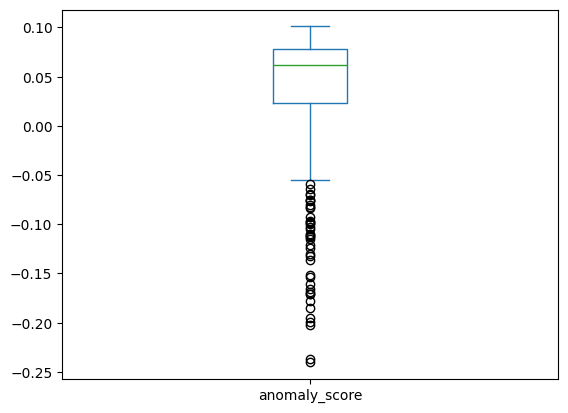

In [46]:
df_transactions["anomaly_score"].plot.box()

In [ ]:
normal_data = df_transactions[(df_transactions["anomaly_score"] >= -0.07)]
normal_data

,transacao1,transacao2,anomaly_score
0,12.669211,62.587129,0.056394
1,32.354746,-21.460716,0.010236
2,-16.493253,33.112899,0.082883
3,1.042115,60.217991,0.058404
4,11.959012,59.423824,0.057398
...,...,...,...
645,372.009668,24.065374,0.054239
646,399.629828,37.392594,0.042328
647,391.935880,15.374113,0.092313
648,382.099797,6.520470,0.080525


In [48]:
anomalies_data = df_transactions[(df_transactions["anomaly_score"] < -0.07)]
anomalies_data

,transacao1,transacao2,anomaly_score
31,-61.925655,-61.041089,-0.136401
200,-20.422619,220.719482,-0.110818
201,64.411877,163.811964,-0.070298
202,1.626088,267.727601,-0.185148
205,-123.439975,18.766044,-0.123924
206,-5.578133,208.352390,-0.075024
207,-152.291185,148.034476,-0.177919
212,341.625160,-129.689793,-0.202710
213,320.176912,-109.803638,-0.195807
214,393.558112,174.588666,-0.113286


In [49]:
import matplotlib.pyplot as plt

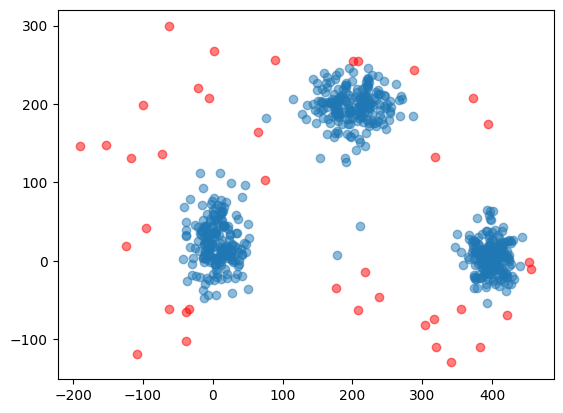

In [54]:
plt.scatter(normal_data["transacao1"], normal_data["transacao2"], alpha=0.5)
plt.scatter(anomalies_data["transacao1"], anomalies_data["transacao2"], color="red", alpha=0.5)